# Malayalam Cinema Data Analysis (1990–2025)

**Aim:**  
Analyze trends in Malayalam-language cinema since 1990 using a combined dataset from IMDb and Wikipedia. This project explores how movie production, genres, ratings, popularity, and runtimes have evolved over the modern era.

---

**Data Sources:**  
- IMDb: `title.basics.tsv`, `title.ratings.tsv` (movies, titles, genres, years, ratings, votes)
- Wikipedia: Scraped list of Malayalam movie titles (1990–2025)

---

**Key Steps:**
1. Scraped Malayalam film titles by year from Wikipedia (1990–2025).
2. Loaded IMDb datasets and filtered to feature films.
3. Matched Malayalam titles to IMDb records to obtain metadata and ratings.
4. Further filtered to years ≥1990 for accurate, modern analysis.
5. Performed exploratory data analysis (EDA) to discover trends.

---

**Assumptions and Choices:**  
- Filtered movies by matching titles (case-insensitive) and by startYear ≥ 1990 to reduce false matches.
- Excluded movies with low IMDb vote counts when finding top-rated, to avoid unreliable outliers.
- Limitation: Title-only matching without language/country metadata may leave some non-Malayalam or missing movies.

---

**Main Analysis Areas:**
- Annual movie output
- Genre frequency and evolution
- IMDb ratings and vote trends
- Runtime trends


In [1]:
import pandas as pd

In [2]:
# Load Datasets

title_basics = pd.read_csv('../data/title.basics.tsv', sep='\t', low_memory=False)
title_ratings = pd.read_csv('../data/title.ratings.tsv', sep='\t', low_memory=False)

In [3]:
print("Title Basics Sample:")
print(title_basics.head())

Title Basics Sample:
      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short            Poor Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

   isAdult startYear endYear runtimeMinutes                    genres  
0        0      1894      \N              1         Documentary,Short  
1        0      1892      \N              5           Animation,Short  
2        0      1892      \N              5  Animation,Comedy,Romance  
3        0      1892      \N             12           Animation,Short  
4        0      1893      \N              1                     Short  


In [4]:
print("\nTitle Ratings Sample:")
print(title_ratings.head())


Title Ratings Sample:
      tconst  averageRating  numVotes
0  tt0000001            5.7      2178
1  tt0000002            5.5       299
2  tt0000003            6.4      2243
3  tt0000004            5.2       193
4  tt0000005            6.2      2987


In [5]:
movies = title_basics[title_basics['titleType'] == 'movie']
print(f"\nTotal movies in dataset: {len(movies)}")


Total movies in dataset: 725405


In [6]:
movies_with_ratings = pd.merge(movies, title_ratings, on='tconst', how='left')
print(f"\nSample movies with ratings:")
print(movies_with_ratings.head())


Sample movies with ratings:
      tconst titleType                   primaryTitle  \
0  tt0000009     movie                     Miss Jerry   
1  tt0000147     movie  The Corbett-Fitzsimmons Fight   
2  tt0000502     movie                       Bohemios   
3  tt0000574     movie    The Story of the Kelly Gang   
4  tt0000591     movie               The Prodigal Son   

                   originalTitle  isAdult startYear endYear runtimeMinutes  \
0                     Miss Jerry        0      1894      \N             45   
1  The Corbett-Fitzsimmons Fight        0      1897      \N            100   
2                       Bohemios        0      1905      \N            100   
3    The Story of the Kelly Gang        0      1906      \N             70   
4              L'enfant prodigue        0      1907      \N             90   

                       genres  averageRating  numVotes  
0                     Romance            5.3     228.0  
1      Documentary,News,Sport            5.2 

In [7]:
# Save the merged dataset for future use
movies_with_ratings.to_csv('../data/movies_with_ratings.csv', index=False)

In [8]:
# Filter movies containing "Malayalam" keyword in title (basic approximate filter)
malayalam_movies = movies_with_ratings[
    movies_with_ratings['primaryTitle'].str.contains('Malayalam', case=False, na=False) |
    movies_with_ratings['originalTitle'].str.contains('Malayalam', case=False, na=False)
]

print(f"Malayalam movies found: {len(malayalam_movies)}")
print(malayalam_movies.head())

Malayalam movies found: 5
            tconst titleType                                  primaryTitle  \
383502   tt1899287     movie                    Shakespeare M.A. Malayalam   
524567  tt33024679     movie                              Khakii Malayalam   
531773  tt33400588     movie                                18+(malayalam)   
546257  tt35048657     movie  P.W.D - Proposal Wedding Divorce (Malayalam)   
661673   tt6655848     movie                    Oru Malayalam Colour Padam   

                                       originalTitle  isAdult startYear  \
383502                    Shakespeare M.A. Malayalam        0      2008   
524567                              Khakii Malayalam        0      2021   
531773                                18+(malayalam)        0      2023   
546257  P.W.D - Proposal Wedding Divorce (Malayalam)        0      2025   
661673                    Oru Malayalam Colour Padam        0      2017   

       endYear runtimeMinutes        genres  averageRa

In [9]:
# Load IMDb movies with ratings 
movies_with_ratings = pd.read_csv('../data/movies_with_ratings.csv')  

/var/folders/59/bhh06h2n5hdb0bdslr2gc1k80000gn/T/ipykernel_76526/2876712217.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_with_ratings = pd.read_csv('../data/movies_with_ratings.csv')


In [10]:
# Load scraped Malayalam movie titles
malayalam_titles = pd.read_csv('../data/malayalam_movie_titles.csv')

In [11]:
# Normalize titles to lowercase for matching
malayalam_titles_list = malayalam_titles['title'].str.lower().tolist()

In [12]:
# Convert IMDb movie titles to lowercase
movies_with_ratings['primaryTitle_lower'] = movies_with_ratings['primaryTitle'].str.lower()


In [13]:
# Filter for Malayalam movies
malayalam_movies_df = movies_with_ratings[
    movies_with_ratings['primaryTitle_lower'].isin(malayalam_titles_list)
].copy()

print(f"Total Malayalam movies after filtering: {len(malayalam_movies_df)}")

# Preview
malayalam_movies_df.head()

Total Malayalam movies after filtering: 3174


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,primaryTitle_lower
312,tt0003337,movie,Robin Hood,Robin Hood,0,1913,\N,\N,Adventure,5.6,61.0,robin hood
594,tt0004259,movie,Love,Love,0,1914,\N,\N,\N,NaN,NaN,love
836,tt0004873,movie,Alice in Wonderland,Alice in Wonderland,0,1915,\N,52,"Adventure,Family,Fantasy",6.1,916.0,alice in wonderland
1584,tt0006368,movie,April,April,0,1916,\N,\N,Drama,NaN,NaN,april
2035,tt0007146,movie,One Day,One Day,0,1916,\N,\N,"Adventure,Drama,Romance",6.3,24.0,one day


In [14]:
malayalam_movies_df.to_csv('../data/malayalam_movies_filtered.csv', index=False)

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#df = pd.read_csv('../data/malayalam_movies_filtered.csv')

In [17]:
#print(df.info())
#print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tconst              3174 non-null   object 
 1   titleType           3174 non-null   object 
 2   primaryTitle        3174 non-null   object 
 3   originalTitle       3174 non-null   object 
 4   isAdult             3174 non-null   int64  
 5   startYear           3174 non-null   object 
 6   endYear             3174 non-null   object 
 7   runtimeMinutes      3174 non-null   object 
 8   genres              3174 non-null   object 
 9   averageRating       2049 non-null   float64
 10  numVotes            2049 non-null   float64
 11  primaryTitle_lower  3174 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 297.7+ KB
None
           isAdult  averageRating       numVotes
count  3174.000000    2049.000000    2049.000000
mean      0.004411       5.972230    415

In [18]:
# Convert startYear to numeric and drop invalid years
#df['startYear'] = pd.to_numeric(df['startYear'], errors='coerce')
# Remove movies with years unlikely for Malayalam cinema
#df = df[(df['startYear'] >= 1990) & (df['startYear'] <= 2025)]

#df = df.dropna(subset=['startYear'])

## Number of Movies per Year
This plot tracks the annual output of Malayalam films from 1990 onward, revealing patterns in the industry's growth and major disruptions.

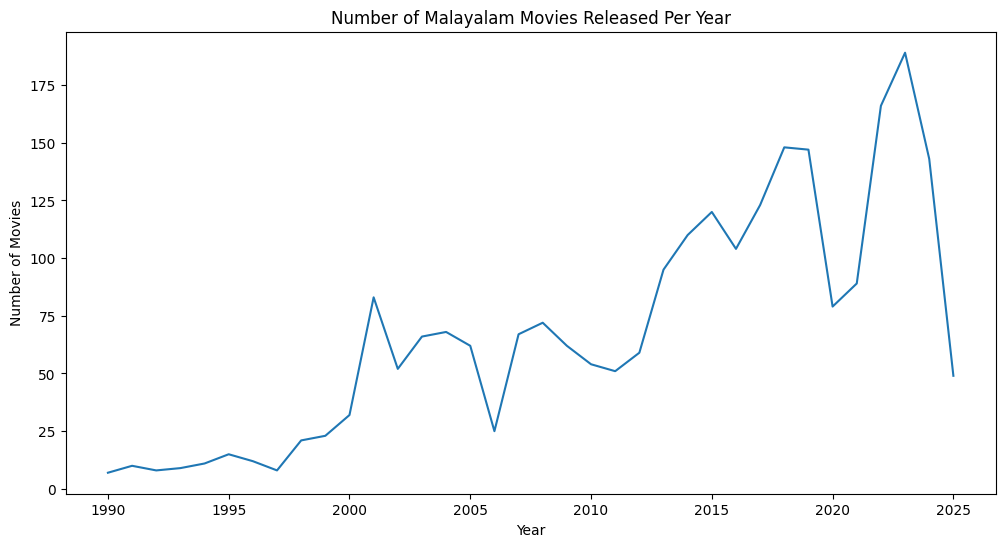

In [19]:
# Movies per year
movies_per_year = df.groupby('startYear').size()
plt.figure(figsize=(12,6))
sns.lineplot(data=movies_per_year)
plt.title('Number of Malayalam Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

**Key Insight:**  
Malayalam movie production has shown significant growth since the early 2000s, with a notable boom in the 2010s. The dip around 2020 likely reflects the impacts of the COVID-19 pandemic on film production and release schedules.

## Top 10 Malayalam Movie Genres
This horizontal bar chart shows the frequency of different genres among Malayalam films released since 1990.

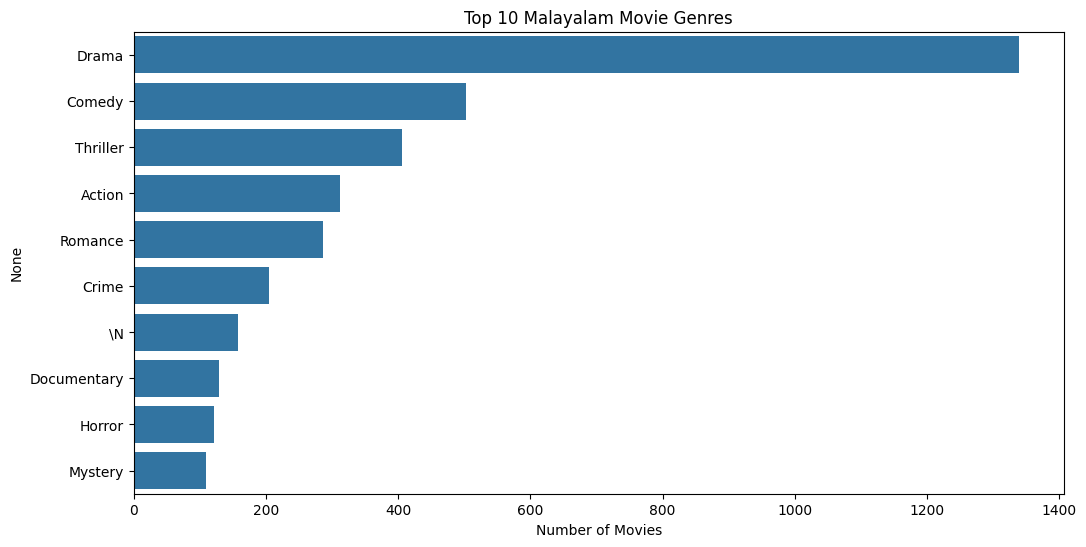

In [20]:
# Genre frequency (split by commas)
all_genres = df['genres'].dropna().str.split(',', expand=True).stack().str.strip()
genre_counts = all_genres.value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.values[:10], y=genre_counts.index[:10])
plt.title('Top 10 Malayalam Movie Genres')
plt.xlabel('Number of Movies')
plt.show()

**Key Insight:**  
Drama overwhelmingly dominates as the most common genre, reflecting Malayalam cinema’s reputation for realistic storytelling and character-driven narratives. Comedy and Thriller also feature prominently, while genres like Documentary, Horror, and Mystery are less frequent. The minor presence of '\N' indicates missing metadata for some films.

## Distribution of IMDb Ratings for Malayalam Movies
This histogram visualizes the spread of IMDb user ratings for Malayalam movies. The vertical axis is number of movies; the horizontal axis is IMDb rating (1–10).

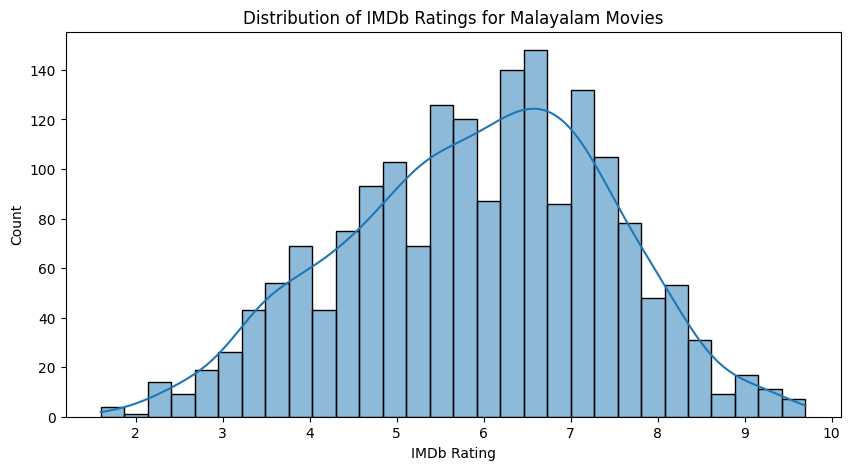

In [21]:
# Ratings distribution
plt.figure(figsize=(10,5))
sns.histplot(df['averageRating'].dropna(), bins=30, kde=True)
plt.title('Distribution of IMDb Ratings for Malayalam Movies')
plt.xlabel('IMDb Rating')
plt.ylabel('Count')
plt.show()

**Key Insight:**  
Most movies cluster around the 6–7 rating range, forming a near-normal (bell-curve) distribution. This suggests audience reviews trend toward the middle rather than extremes, with relatively few movies rated below 4 or above 9.

## IMDb Ratings of Malayalam Movies Over Time
This scatterplot tracks the distribution of IMDb ratings for individual Malayalam movies by their release year from 1990 onward.

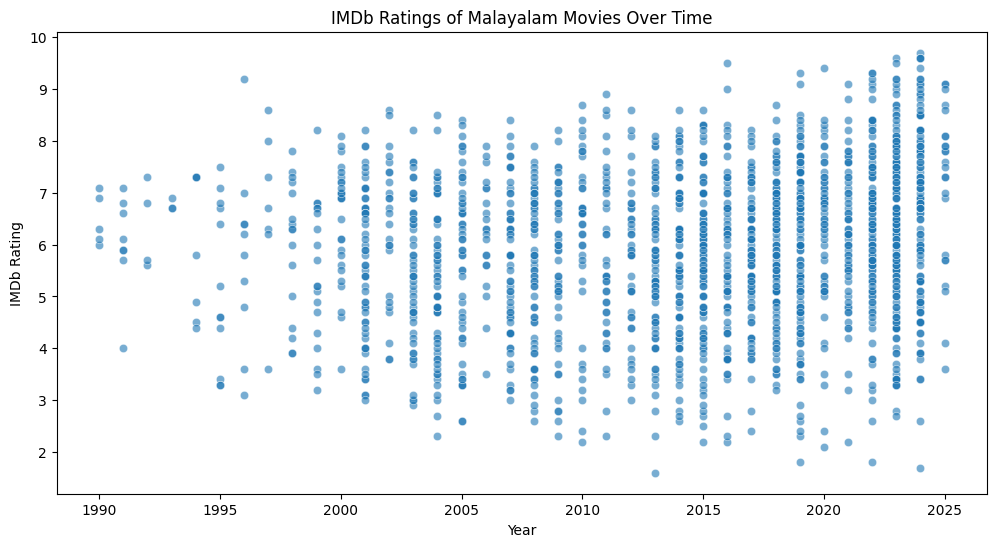

In [22]:
# IMDb Ratings Over Time
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='startYear', y='averageRating', alpha=0.6)
plt.title('IMDb Ratings of Malayalam Movies Over Time')
plt.xlabel('Year')
plt.ylabel('IMDb Rating')
plt.show()

**Key Insight:**  
There is no clear long-term upward or downward trend in IMDb ratings, but the high density of movies with ratings between 5 and 8 post-2000 reveals increasing volume and diversity. Occasional outliers above 9 or below 3 are visible, typically associated with cult hits or poorly received films.

## Total IMDb Votes for Malayalam Movies Per Year
This line chart aggregates the total number of IMDb user votes for all Malayalam movies released each year.

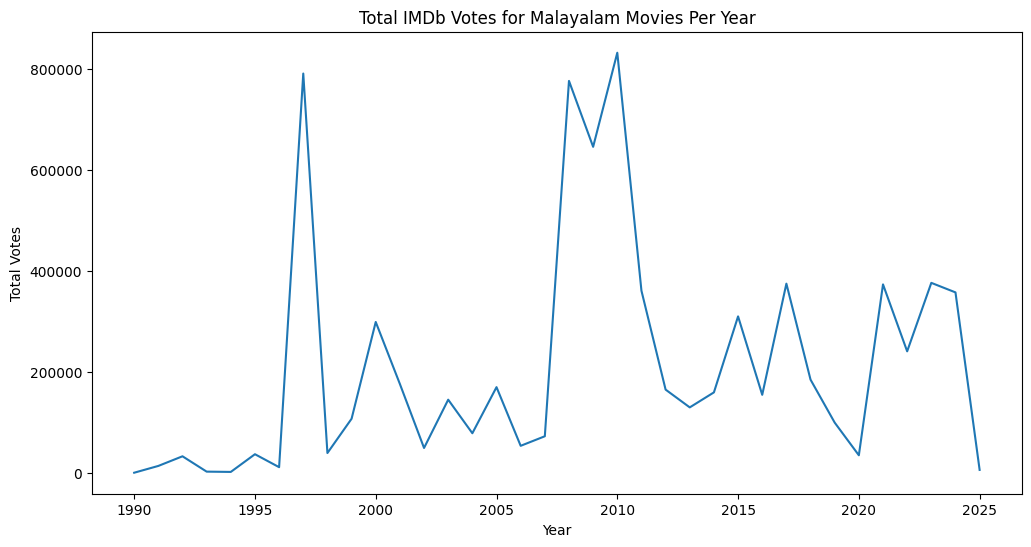

In [23]:
# vote counts over time
plt.figure(figsize=(12,6))
sns.lineplot(data=df.groupby('startYear')['numVotes'].sum())
plt.title('Total IMDb Votes for Malayalam Movies Per Year')
plt.xlabel('Year')
plt.ylabel('Total Votes')
plt.show()

**Key Insight:**  
User engagement (votes) remained relatively low in the 1990s but rose sharply in the 2000s, coinciding with India’s internet growth and the global reach of Malayalam cinema. Peaks and dips likely correlate with the release of major blockbusters, digital transitions, or pandemic-related disruptions.

## Top 10 Highest Rated Malayalam Movies (since 1990)

This table lists the highest-rated Malayalam films based on IMDb user scores, with a substantial number of votes to ensure reliability. Titles are shown with their release years, genres, average rating, and vote count.

In [24]:
# Only considering movies with at least 1000 votes for quality

popular = df[df['numVotes'] >= 1000]
top_rated = popular.sort_values(by='averageRating', ascending=False).head(10)
print(top_rated[['primaryTitle', 'startYear', 'genres', 'averageRating', 'numVotes']])

                 primaryTitle  startYear                genres  averageRating  \
165         Life Is Beautiful     1997.0  Comedy,Drama,Romance            8.6   
2213                   August     2024.0           Documentary            8.5   
3044        Kumbalangi Nights     2019.0  Comedy,Drama,Romance            8.5   
718                Thanmathra     2005.0                 Drama            8.4   
1072               Drishyam 2     2021.0   Crime,Drama,Mystery            8.4   
2549                   Premam     2015.0  Comedy,Drama,Romance            8.3   
2587                Pathemari     2015.0                 Drama            8.3   
2567  Maheshinte Prathikaaram     2016.0  Comedy,Drama,Romance            8.3   
1619                   Runway     2010.0                 Drama            8.2   
1386               Drishyam 2     2022.0   Crime,Drama,Mystery            8.2   

      numVotes  
165   789473.0  
2213    3015.0  
3044   20571.0  
718     5251.0  
1072   43652.0  
2549  

**Key Insight:**  
This top 10 reflects critically acclaimed and *popular* Malayalam cinema, with major audience and industry recognition. Films like *Kumbalangi Nights*, *Premam*, *Thanmathra*, and *Drishyam 2* are celebrated for storytelling and cultural impact. The inclusion of both older ('Life Is Beautiful', 1997) and very recent ('August', 2024) titles shows the continued vibrancy of the industry. The strong vote counts (especially for blockbusters like *Drishyam 2* and *Kumbalangi Nights*) confirm wide audience engagement and enduring appeal.

## Average Runtime of Malayalam Movies Over Time
This line plot displays the average runtime (in minutes) of Malayalam movies released each year since 1990, with a shaded area indicating annual variability (standard deviation).

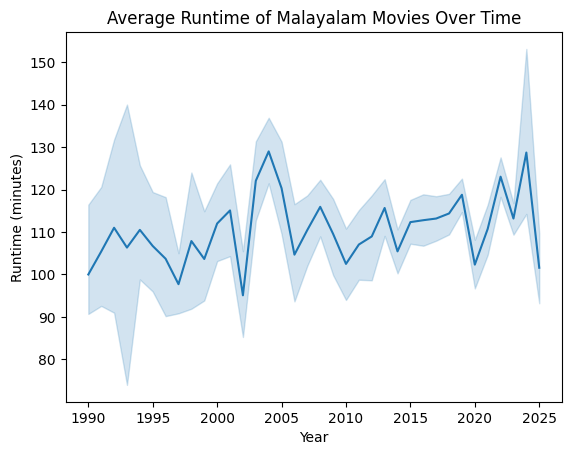

In [25]:
# Runtime over time
df['runtimeMinutes'] = pd.to_numeric(df['runtimeMinutes'], errors='coerce')
sns.lineplot(x='startYear', y='runtimeMinutes', data=df)
plt.title('Average Runtime of Malayalam Movies Over Time')
plt.xlabel('Year')
plt.ylabel('Runtime (minutes)')
plt.show()

**Key Insight:**  
The typical runtime of Malayalam films has mostly remained between 100 and 125 minutes, with moderate fluctuations year-to-year. Recent years show a slight increasing trend, consistent with the rise of OTT releases and ambitious storytelling. Some high-spread years indicate more diversity in film lengths.

## Top 5 Malayalam Movie Genres Over Time
This line plot tracks the annual output of the five most frequent genres in Malayalam cinema since 1990.

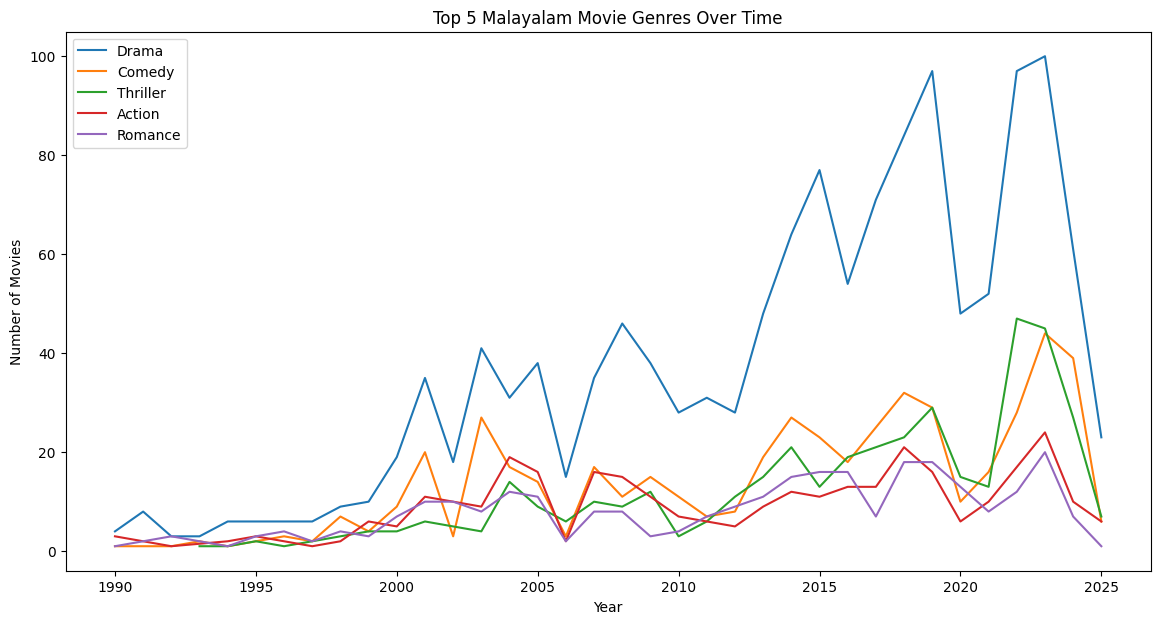

In [26]:
# Genre popularity over time


# Explode genres into separate rows
df_genres = df.dropna(subset=['genres']).copy()
df_genres['genres'] = df_genres['genres'].str.split(',')
df_genres = df_genres.explode('genres')
df_genres['genres'] = df_genres['genres'].str.strip()

# Aggregate by year and genre
genre_year_count = df_genres.groupby(['startYear', 'genres']).size().reset_index(name='count')

# Plot top genres trend
import seaborn as sns
import matplotlib.pyplot as plt

# Select top 5 genres overall
top5_genres = df_genres['genres'].value_counts().head(5).index.tolist()
plt.figure(figsize=(14,7))
for genre in top5_genres:
    data = genre_year_count[genre_year_count['genres'] == genre]
    sns.lineplot(x='startYear', y='count', data=data, label=genre)

plt.title('Top 5 Malayalam Movie Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend()
plt.show()


**Key Insight:**  
Drama is consistently the leading genre, but there’s rising presence and stability in Comedy, Thriller, Action, and Romance films since the 2000s. Each genre’s upward trend highlights diversification to meet changing audience tastes, with all five genres showing healthy production volumes, especially in the 2010s.

## IMDb Ratings vs. Number of Votes (log scale)
Each point represents a Malayalam movie, with IMDb rating on the vertical axis and the total number of user votes (on a logarithmic scale) on the horizontal axis.

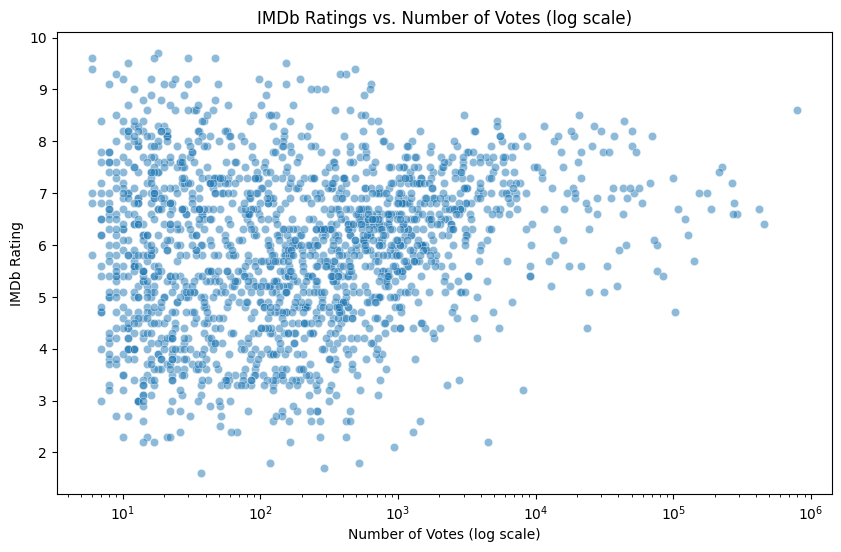

In [27]:
# Ratings vs Vote counts

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='numVotes', y='averageRating', alpha=0.5)
plt.xscale('log')  # logarithmic scale for votes
plt.title('IMDb Ratings vs. Number of Votes (log scale)')
plt.xlabel('Number of Votes (log scale)')
plt.ylabel('IMDb Rating')
plt.show()


**Key Insight:**  
There is a weak positive relationship: popular, heavily voted films tend to avoid extreme ratings and cluster around 6–8, while lesser-known movies show more spread, including some high and low outliers. This pattern reflects statistical stabilization of ratings as vote counts grow.

## Yearly Average IMDb Rating and Median Number of Votes for Malayalam Movies
This dual-axis plot shows the evolution of both the average IMDb rating (left axis, blue) and the median number of votes (right axis, red) for Malayalam films, year by year.

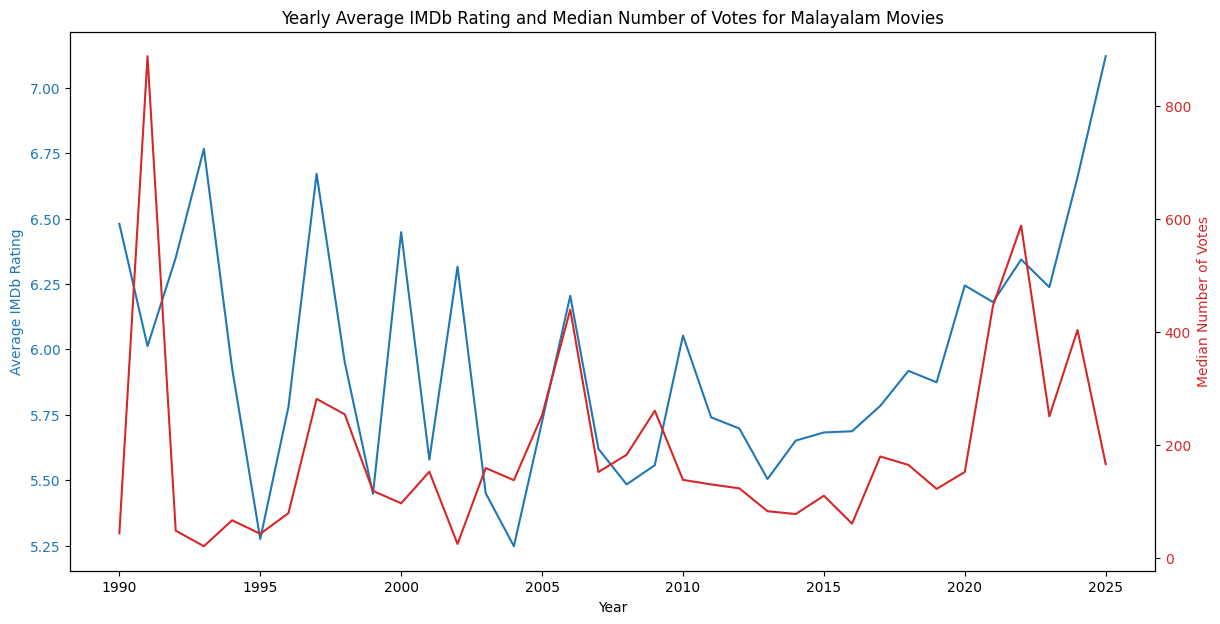

In [28]:
# Yearly Average Rating and Vote Count

yearly_stats = df.groupby('startYear').agg({
    'averageRating': 'mean',
    'numVotes': 'median'
}).reset_index()

fig, ax1 = plt.subplots(figsize=(14,7))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Average IMDb Rating', color=color)
ax1.plot(yearly_stats['startYear'], yearly_stats['averageRating'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Median Number of Votes', color=color)
ax2.plot(yearly_stats['startYear'], yearly_stats['numVotes'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Yearly Average IMDb Rating and Median Number of Votes for Malayalam Movies')
plt.show()


**Key Insight:**  
Average ratings remain mostly steady but show a gentle upward drift in the 2010s and 2020s, possibly due to higher production values and critical acclaim for recent releases. Median vote counts fluctuate but also rise in recent years, indicating growing viewer engagement and the expanding reach of Malayalam cinema.

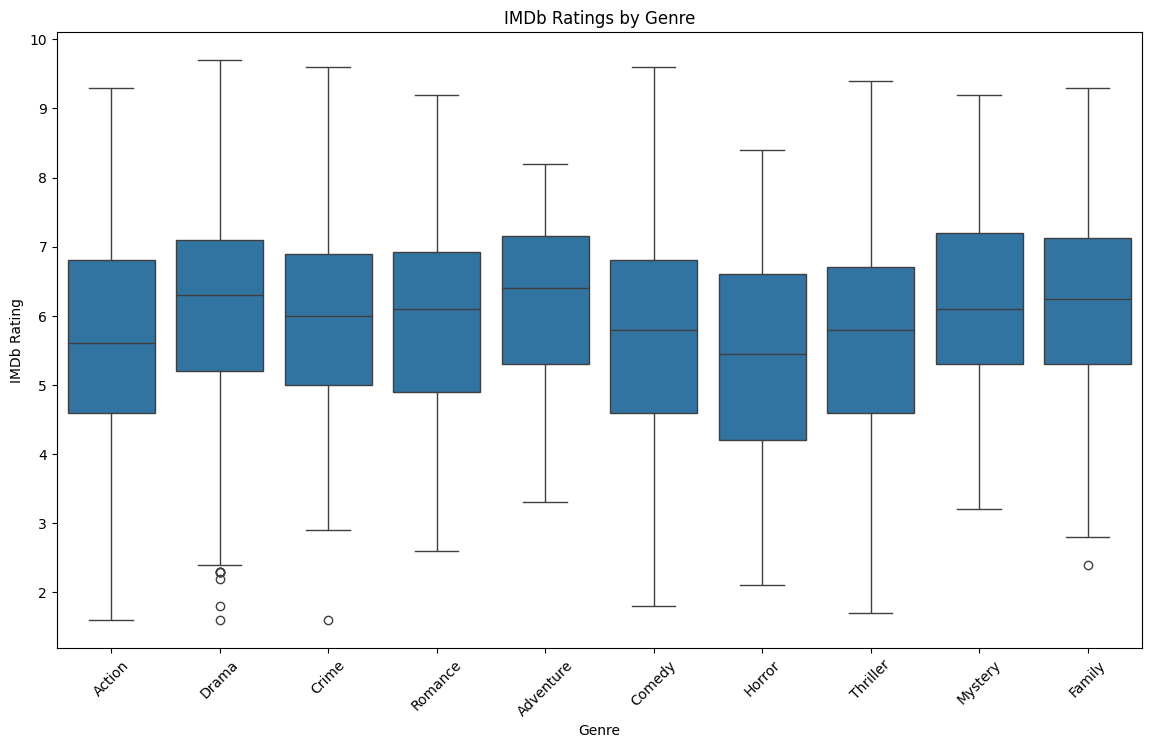

In [29]:
# Prepare: explode genres column so each row is a (movie, genre) pair
df_genre = df.copy()
df_genre = df_genre.dropna(subset=['genres', 'averageRating'])
df_genre['genres'] = df_genre['genres'].str.split(',')
df_genre = df_genre.explode('genres')
df_genre['genres'] = df_genre['genres'].str.strip()

# Select top genres only for clarity
top_genres = df_genre['genres'].value_counts().head(10).index.tolist()
df_top = df_genre[df_genre['genres'].isin(top_genres)]

plt.figure(figsize=(14,8))
sns.boxplot(x='genres', y='averageRating', data=df_top)
plt.title('IMDb Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('IMDb Rating')
plt.xticks(rotation=45)
plt.show()

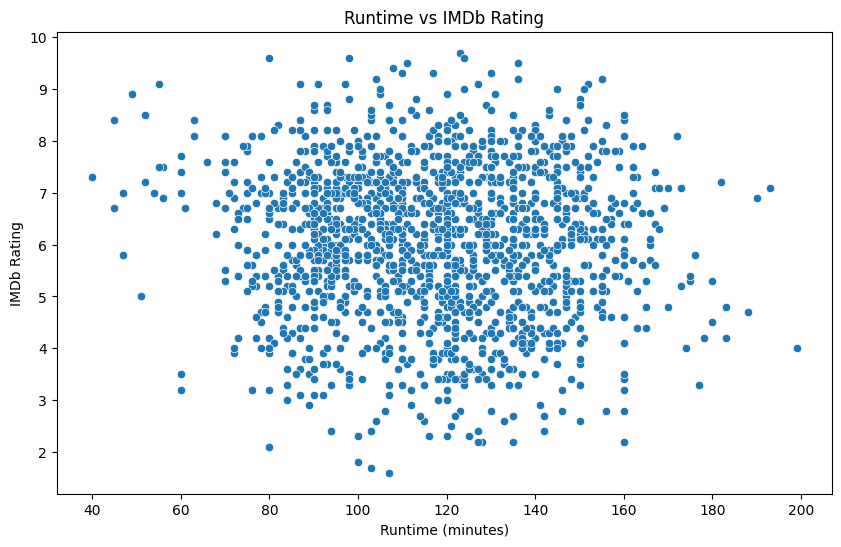

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='runtimeMinutes', y='averageRating', data=df)
plt.title('Runtime vs IMDb Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Rating')
plt.show()

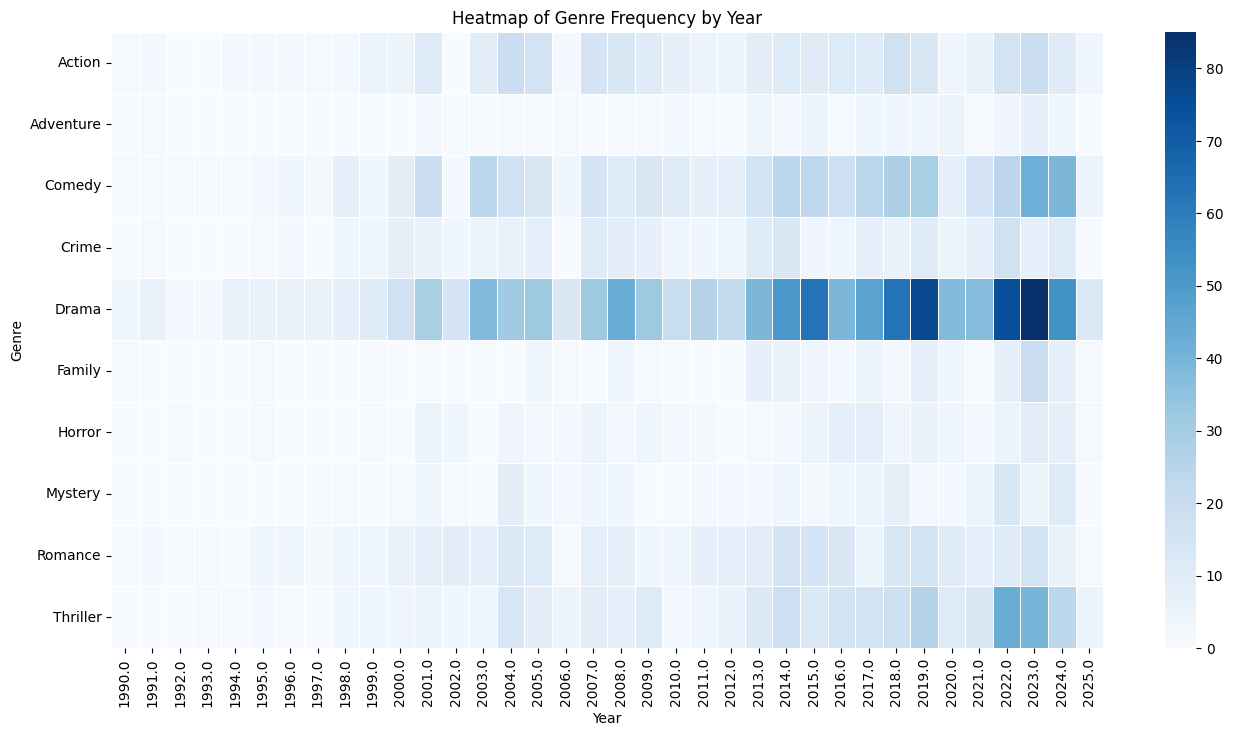

In [31]:
# Prepare pivot table for count of movies per genre per year
genre_year = df_genre.groupby(['startYear', 'genres']).size().reset_index(name='count')
# Filter top genres for display
heatmap_data = genre_year[genre_year['genres'].isin(top_genres)]
heatmap_pivot = heatmap_data.pivot(index='genres', columns='startYear', values='count').fillna(0)

plt.figure(figsize=(16,8))
sns.heatmap(heatmap_pivot, cmap='Blues', linewidths=0.5)
plt.title('Heatmap of Genre Frequency by Year')
plt.xlabel('Year')
plt.ylabel('Genre')
plt.show()


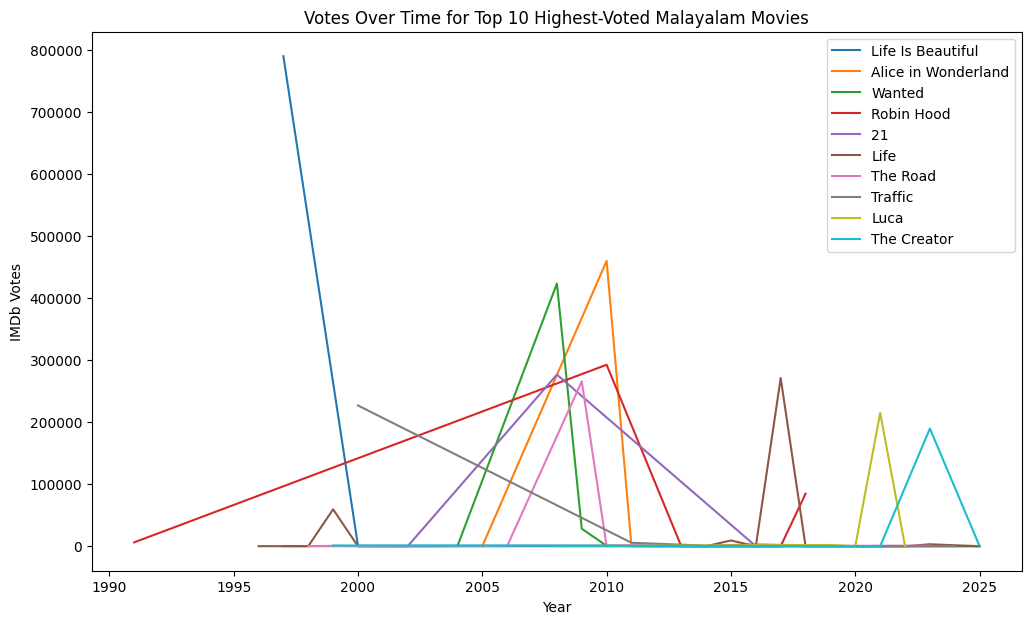

In [32]:
# Find top 10 movies by numVotes
top_voted = df.sort_values(by='numVotes', ascending=False).head(10)

plt.figure(figsize=(12,7))
for idx, row in top_voted.iterrows():
    movie_votes_per_year = df[(df['primaryTitle'] == row['primaryTitle'])].groupby('startYear')['numVotes'].sum()
    plt.plot(movie_votes_per_year.index, movie_votes_per_year.values, label=row['primaryTitle'])

plt.legend()
plt.title('Votes Over Time for Top 10 Highest-Voted Malayalam Movies')
plt.xlabel('Year')
plt.ylabel('IMDb Votes')
plt.show()


In [2]:
print("Loading title.akas.tsv...")
akas = pd.read_csv('../data/title.akas.tsv', sep='\t', low_memory=False)

Loading title.akas.tsv...


In [3]:
print("Filtering for Malayalam language titles...")
ml_akas = akas[akas['language'] == 'ml']
ml_tconsts = ml_akas['titleId'].unique()
print(f"Found {len(ml_tconsts)} Malayalam title IDs.")

Filtering for Malayalam language titles...
Found 818 Malayalam title IDs.


In [4]:
print("Loading title.basics.tsv...")
basics = pd.read_csv('../data/title.basics.tsv', sep='\t', low_memory=False)

Loading title.basics.tsv...


In [5]:
print("Filtering for movies and Malayalam titles...")
ml_movies = basics[(basics['tconst'].isin(ml_tconsts)) & (basics['titleType'] == 'movie')]
print(f"Filtered to {len(ml_movies)} Malayalam movies.")

Filtering for movies and Malayalam titles...
Filtered to 788 Malayalam movies.


In [6]:
print("Loading title.ratings.tsv...")
ratings = pd.read_csv('../data/title.ratings.tsv', sep='\t', low_memory=False)

Loading title.ratings.tsv...


In [7]:
print("Merging ratings with Malayalam movies...")
ml_movies_with_ratings = ml_movies.merge(ratings, on='tconst', how='left')
print(f"Merged dataset has {len(ml_movies_with_ratings)} records.")

Merging ratings with Malayalam movies...
Merged dataset has 788 records.


In [8]:
# Convert startYear to numeric and filter by year >= 1990 for modern analysis
ml_movies_with_ratings['startYear'] = pd.to_numeric(ml_movies_with_ratings['startYear'], errors='coerce')
ml_movies_with_ratings = ml_movies_with_ratings[(ml_movies_with_ratings['startYear'] >= 1990) & (ml_movies_with_ratings['startYear'] <= 2025)]

In [9]:
# Save cleaned Malayalam movie dataset for further analysis
ml_movies_with_ratings.to_csv('../data/ml_movies_cleaned.csv', index=False)
print("Saved cleaned Malayalam movies dataset as 'data/ml_movies_cleaned.csv'.")

Saved cleaned Malayalam movies dataset as 'data/ml_movies_cleaned.csv'.


In [10]:
df = pd.read_csv('../data/ml_movies_cleaned.csv')

print(f"Loaded dataset with {len(df)} Malayalam movies (1990–2025).")

Loaded dataset with 494 Malayalam movies (1990–2025).


In [11]:
# Handle genres: explode genres for analysis
df = df.dropna(subset=['genres'])
df['genres'] = df['genres'].str.split(',')
df = df.explode('genres')
df['genres'] = df['genres'].str.strip()

# Convert numeric columns
df['averageRating'] = pd.to_numeric(df['averageRating'], errors='coerce')
df['numVotes'] = pd.to_numeric(df['numVotes'], errors='coerce')
df['runtimeMinutes'] = pd.to_numeric(df['runtimeMinutes'], errors='coerce')
df['startYear'] = pd.to_numeric(df['startYear'], errors='coerce')

In [21]:
df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0097851,movie,Mathilukal,Mathilukal,0,1990.0,\N,120.0,Drama,8.2,1764.0
0,tt0097851,movie,Mathilukal,Mathilukal,0,1990.0,\N,120.0,Romance,8.2,1764.0
1,tt0099088,movie,Back to the Future Part III,Back to the Future Part III,0,1990.0,\N,118.0,Adventure,7.5,506872.0
1,tt0099088,movie,Back to the Future Part III,Back to the Future Part III,0,1990.0,\N,118.0,Comedy,7.5,506872.0
1,tt0099088,movie,Back to the Future Part III,Back to the Future Part III,0,1990.0,\N,118.0,Sci-Fi,7.5,506872.0


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

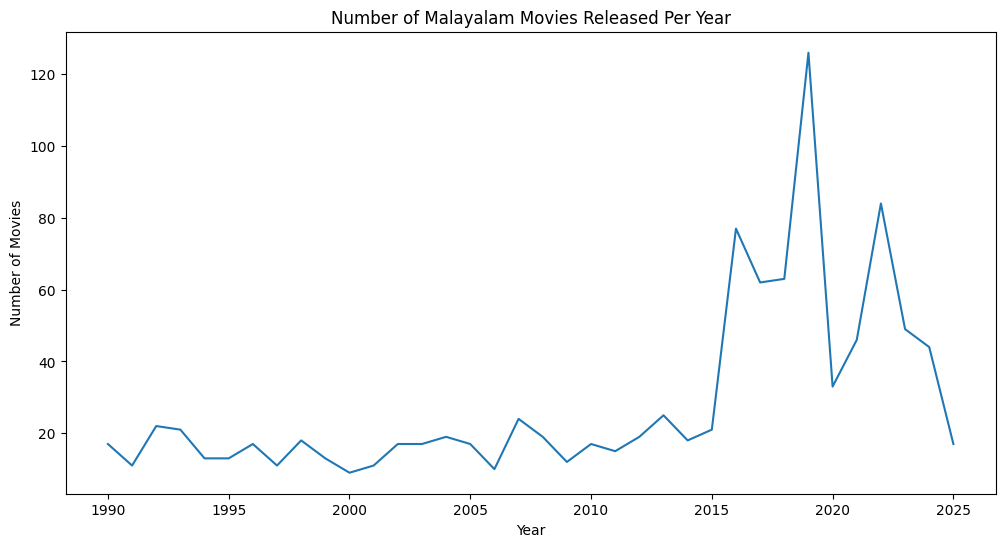

In [13]:
movies_per_year = df.groupby('startYear').size()

plt.figure(figsize=(12,6))
sns.lineplot(data=movies_per_year)
plt.title('Number of Malayalam Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

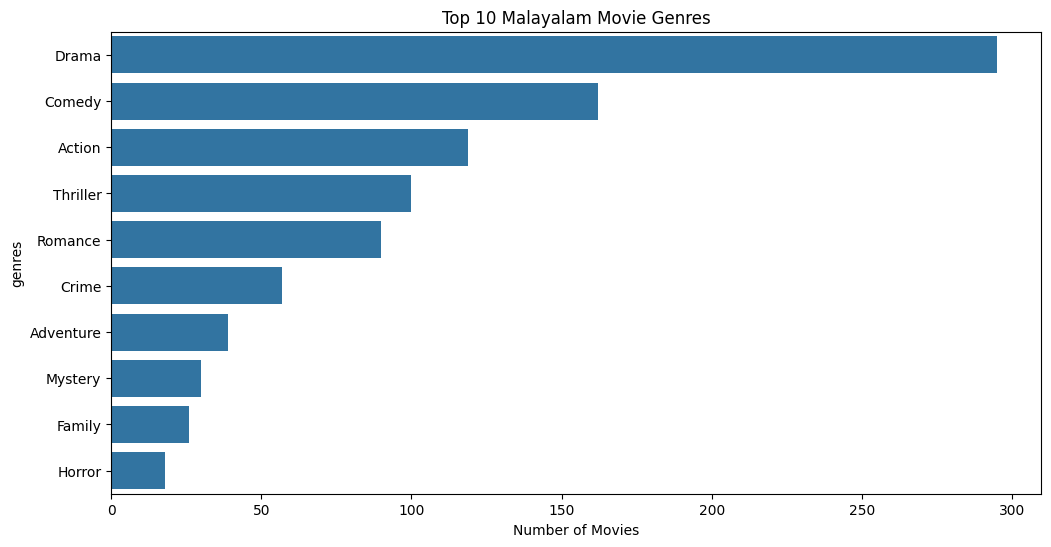

In [14]:
top_genres = df['genres'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 10 Malayalam Movie Genres')
plt.xlabel('Number of Movies')
plt.show()

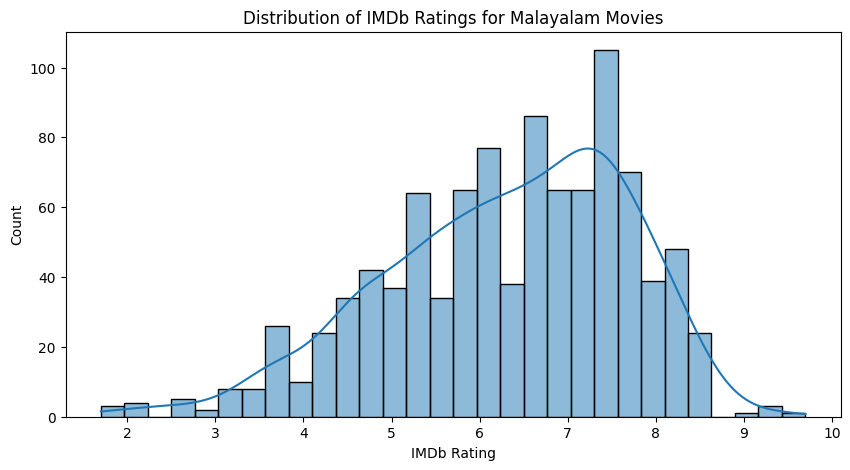

In [15]:
plt.figure(figsize=(10,5))
sns.histplot(df['averageRating'].dropna(), bins=30, kde=True)
plt.title('Distribution of IMDb Ratings for Malayalam Movies')
plt.xlabel('IMDb Rating')
plt.ylabel('Count')
plt.show()

In [22]:
print(df.columns)
print(df.columns[df.columns.duplicated()])

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres', 'averageRating',
       'numVotes'],
      dtype='object')
Index([], dtype='object')


In [16]:
# Check for duplicate columns
print(df.columns[df.columns.duplicated()])

Index([], dtype='object')


In [17]:
df = df.loc[:, ~df.columns.duplicated()]

In [18]:
print(df[['startYear', 'averageRating']].dtypes)
print(df[['startYear', 'averageRating']].head())
print(df[['startYear', 'averageRating']].isnull().sum())

startYear        float64
averageRating    float64
dtype: object
   startYear  averageRating
0     1990.0            8.2
0     1990.0            8.2
1     1990.0            7.5
1     1990.0            7.5
1     1990.0            7.5
startYear         0
averageRating    39
dtype: int64


In [19]:
plot_df = df.dropna(subset=['startYear', 'averageRating'])

ValueError: cannot reindex on an axis with duplicate labels

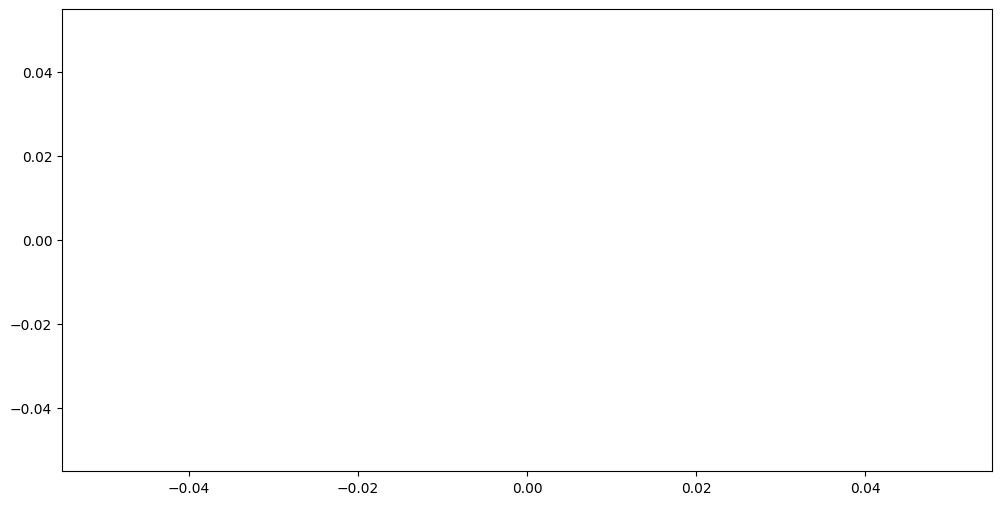

In [20]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='startYear', y='averageRating', alpha=0.6)
plt.title('IMDb Ratings of Malayalam Movies Over Time')
plt.xlabel('Year')
plt.ylabel('IMDb Rating')
plt.show()

In [ ]:
plt.figure(figsize=(14,8))
top_genres = df['genres'].value_counts().head(10).index.tolist()
df_top = df[df['genres'].isin(top_genres)]

sns.boxplot(x='genres', y='averageRating', data=df_top)
plt.title('IMDb Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('IMDb Rating')
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='runtimeMinutes', y='averageRating', data=df)
plt.title('Runtime vs IMDb Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Rating')
plt.show()

In [ ]:
genre_year = df.groupby(['startYear', 'genres']).size().reset_index(name='count')
heatmap_data = genre_year[genre_year['genres'].isin(top_genres)]
heatmap_pivot = heatmap_data.pivot(index='genres', columns='startYear', values='count').fillna(0)

plt.figure(figsize=(16,8))
sns.heatmap(heatmap_pivot, cmap='Blues', linewidths=0.5)
plt.title('Heatmap of Genre Frequency by Year')
plt.xlabel('Year')
plt.ylabel('Genre')
plt.show()

In [ ]:
top_voted = df.sort_values(by='numVotes', ascending=False).head(10)

plt.figure(figsize=(12,7))
for _, row in top_voted.iterrows():
    votes_per_year = df[df['primaryTitle'] == row['primaryTitle']].groupby('startYear')['numVotes'].sum()
    plt.plot(votes_per_year.index, votes_per_year.values, label=row['primaryTitle'])

plt.legend()
plt.title('Votes Over Time for Top 10 Highest-Voted Malayalam Movies')
plt.xlabel('Year')
plt.ylabel('IMDb Votes')
plt.show()

In [1]:
import pandas as pd

In [3]:
# Step 1: Load IMDb datasets
print("Loading title.akas.tsv ...")
akas = pd.read_csv('../data/title.akas.tsv', sep='\t', low_memory=False)
print("Loading title.basics.tsv ...")
basics = pd.read_csv('../data/title.basics.tsv', sep='\t', low_memory=False)
print("Loading title.ratings.tsv ...")
ratings = pd.read_csv('../data/title.ratings.tsv', sep='\t', low_memory=False)
print("Loading title.crew.tsv ...")
crew = pd.read_csv('../data/title.crew.tsv', sep='\t', low_memory=False)


Loading title.akas.tsv ...
Loading title.basics.tsv ...
Loading title.ratings.tsv ...
Loading title.crew.tsv ...


In [4]:
# Step 2: Filter akas for Malayalam language titles
ml_akas = akas[akas['language'] == 'ml']
ml_title_ids = set(ml_akas['titleId'])
print(f"Found {len(ml_title_ids)} Malayalam title IDs in akas.")


Found 818 Malayalam title IDs in akas.


In [5]:
# Step 3: Filter basics dataset for movies, release year ≥ 1990, and Malayalam titles
basics = basics[(basics['titleType'] == 'movie')]
basics['startYear'] = pd.to_numeric(basics['startYear'], errors='coerce')
basics_ml = basics[(basics['startYear'] >= 1990) & (basics['tconst'].isin(ml_title_ids))]
print(f"Filtered basics to {len(basics_ml)} Malayalam movies from 1990 onward.")


Filtered basics to 494 Malayalam movies from 1990 onward.


In [6]:
# Step 4: Merge with ratings dataset
movies_with_ratings = basics_ml.merge(ratings, on='tconst', how='left')
print(f"Merged movies with ratings, resulting in {len(movies_with_ratings)} records.")

Merged movies with ratings, resulting in 494 records.


In [7]:
# Step 5: Merge with crew dataset to get director information
movies_with_crew = movies_with_ratings.merge(crew[['tconst', 'directors']], on='tconst', how='left')


In [9]:
movies_with_crew.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,directors
0,tt0097851,movie,Mathilukal,Mathilukal,0,1990.0,\N,120,"Drama,Romance",8.2,1764.0,nm0329715
1,tt0099088,movie,Back to the Future Part III,Back to the Future Part III,0,1990.0,\N,118,"Adventure,Comedy,Sci-Fi",7.5,506872.0,nm0000709
2,tt0099487,movie,Edward Scissorhands,Edward Scissorhands,0,1990.0,\N,105,"Drama,Fantasy,Romance",7.8,551760.0,nm0000318
3,tt0099785,movie,Home Alone,Home Alone,0,1990.0,\N,103,"Comedy,Family",7.7,705721.0,nm0001060
4,tt0100802,movie,Total Recall,Total Recall,0,1990.0,\N,113,"Action,Adventure,Sci-Fi",7.5,373173.0,nm0000682


In [ ]:
# Reduce akas to unique titles and their languages (some titles may have multiple languages, keep Malayalam only)
ml_akas_unique = akas[akas['language'] == 'ml'][['titleId', 'language']]
# Drop duplicates so each titleId appears only once
ml_akas_unique = ml_akas_unique.drop_duplicates(subset='titleId')

# Merge this language info into your movies_with_crew DataFrame via tconst / titleId
movies_with_crew = movies_with_crew.merge(ml_akas_unique, how='left', left_on='tconst', right_on='titleId')

# Now you can filter using the 'language' column
vote_threshold = 50000
final_ml_movies = movies_with_crew[
    ((movies_with_crew['language'] == 'ml') & (movies_with_crew['numVotes'].fillna(0) < vote_threshold)) |
    (movies_with_crew['primaryTitle'].isin(ml_akas['title']))
]

In [8]:
# Keep movies with vote counts below a certain unusually high threshold for Malayalam films
vote_threshold = 50000
final_ml_movies = movies_with_crew[
    (movies_with_crew['primaryTitle'].isin(ml_akas['title'])) | 
    ((movies_with_crew['numVotes'].fillna(0) < vote_threshold) & (movies_with_crew['language'] == 'ml'))
]


KeyError: 'language'

In [ ]:
# Step 7: Save cleaned Malayalam movie dataset for further use
final_ml_movies.to_csv('data/ml_movies_cleaned_precise.csv', index=False)
print("Saved cleaned Malayalam movie dataset as 'data/ml_movies_cleaned_precise.csv'.")

In [2]:
import pandas as pd

# Step 1: Load IMDb datasets
print("Loading title.akas.tsv ...")
akas = pd.read_csv('../data/title.akas.tsv', sep='\t', low_memory=False)
print("Loading title.basics.tsv ...")
basics = pd.read_csv('../data/title.basics.tsv', sep='\t', low_memory=False)
print("Loading title.ratings.tsv ...")
ratings = pd.read_csv('../data/title.ratings.tsv', sep='\t', low_memory=False)
print("Loading title.crew.tsv ...")
crew = pd.read_csv('../data/title.crew.tsv', sep='\t', low_memory=False)

# Step 2: Filter akas for Malayalam language titles
ml_akas = akas[akas['language'] == 'ml']
ml_title_ids = set(ml_akas['titleId'])
print(f"Found {len(ml_title_ids)} Malayalam title IDs in akas.")

# Step 3: Filter basics dataset for movies, release year >= 1990, and Malayalam titles
basics = basics[(basics['titleType'] == 'movie')]
basics['startYear'] = pd.to_numeric(basics['startYear'], errors='coerce')
basics_ml = basics[(basics['startYear'] >= 1990) & (basics['tconst'].isin(ml_title_ids))]
print(f"Filtered basics to {len(basics_ml)} Malayalam movies from 1990 onward.")

# Step 4: Merge with ratings dataset
movies_with_ratings = basics_ml.merge(ratings, on='tconst', how='left')
print(f"Merged movies with ratings, resulting in {len(movies_with_ratings)} records.")

# Step 5: Merge with crew dataset to get director information
movies_with_crew = movies_with_ratings.merge(crew[['tconst', 'directors']], on='tconst', how='left')

# Step 6: Add 'language' column from akas dataset for filtering and validation
ml_akas_unique = ml_akas[['titleId', 'language']].drop_duplicates(subset='titleId')
movies_with_crew = movies_with_crew.merge(ml_akas_unique, how='left', left_on='tconst', right_on='titleId')

# Step 7: Apply filtering to keep only Malayalam movies with reasonable vote counts
vote_threshold = 50000
final_ml_movies = movies_with_crew[
    ((movies_with_crew['language'] == 'ml') & (movies_with_crew['numVotes'].fillna(0) < vote_threshold)) |
    (movies_with_crew['primaryTitle'].isin(ml_akas['title']))
]
print(f"After filtering, final Malayalam movie count: {len(final_ml_movies)}")

# Step 8: Save cleaned Malayalam movie dataset for analysis
final_ml_movies.to_csv('../data/ml_movies_cleaned_precise.csv', index=False)
print("Saved cleaned Malayalam movie dataset as 'data/ml_movies_cleaned_precise.csv'.")


Loading title.akas.tsv ...
Loading title.basics.tsv ...
Loading title.ratings.tsv ...
Loading title.crew.tsv ...
Found 818 Malayalam title IDs in akas.
Filtered basics to 494 Malayalam movies from 1990 onward.
Merged movies with ratings, resulting in 494 records.
After filtering, final Malayalam movie count: 484
Saved cleaned Malayalam movie dataset as 'data/ml_movies_cleaned_precise.csv'.


In [3]:
final_ml_movies.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,directors,titleId,language
0,tt0097851,movie,Mathilukal,Mathilukal,0,1990.0,\N,120,"Drama,Romance",8.2,1764.0,nm0329715,tt0097851,ml
2,tt0099487,movie,Edward Scissorhands,Edward Scissorhands,0,1990.0,\N,105,"Drama,Fantasy,Romance",7.8,551760.0,nm0000318,tt0099487,ml
3,tt0099785,movie,Home Alone,Home Alone,0,1990.0,\N,103,"Comedy,Family",7.7,705721.0,nm0001060,tt0099785,ml
4,tt0100802,movie,Total Recall,Total Recall,0,1990.0,\N,113,"Action,Adventure,Sci-Fi",7.5,373173.0,nm0000682,tt0100802,ml
5,tt0101507,movie,Boyz n the Hood,Boyz n the Hood,0,1991.0,\N,112,"Crime,Drama",7.8,164287.0,nm0005436,tt0101507,ml
